In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/dogs-cats-images/dog vs cat/dataset/test_set/cats/cat.4885.jpg
/kaggle/input/dogs-cats-images/dog vs cat/dataset/test_set/cats/cat.4796.jpg
/kaggle/input/dogs-cats-images/dog vs cat/dataset/test_set/cats/cat.4893.jpg
/kaggle/input/dogs-cats-images/dog vs cat/dataset/test_set/cats/cat.4643.jpg
/kaggle/input/dogs-cats-images/dog vs cat/dataset/test_set/cats/cat.4604.jpg
/kaggle/input/dogs-cats-images/dog vs cat/dataset/test_set/cats/cat.4122.jpg
/kaggle/input/dogs-cats-images/dog vs cat/dataset/test_set/cats/cat.4662.jpg
/kaggle/input/dogs-cats-images/dog vs cat/dataset/test_set/cats/cat.4707.jpg
/kaggle/input/dogs-cats-images/dog vs cat/dataset/test_set/cats/cat.4533.jpg
/kaggle/input/dogs-cats-images/dog vs cat/dataset/test_set/cats/cat.4151.jpg
/kaggle/input/dogs-cats-images/dog vs cat/dataset/test_set/cats/cat.4920.jpg
/kaggle/input/dogs-cats-images/dog vs cat/dataset/test_set/cats/cat.4348.jpg
/kaggle/input/dogs-cats-images/dog vs cat/dataset/test_set/cats/cat.4218.jpg

In [2]:
from fastai.vision import *


In [3]:
path = Path('../input/dogs-cats-images/dataset/training_set/')
path.ls()

[PosixPath('../input/dogs-cats-images/dataset/training_set/cats'),
 PosixPath('../input/dogs-cats-images/dataset/training_set/dogs')]

In [4]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [5]:

data.classes

['cats', 'dogs']

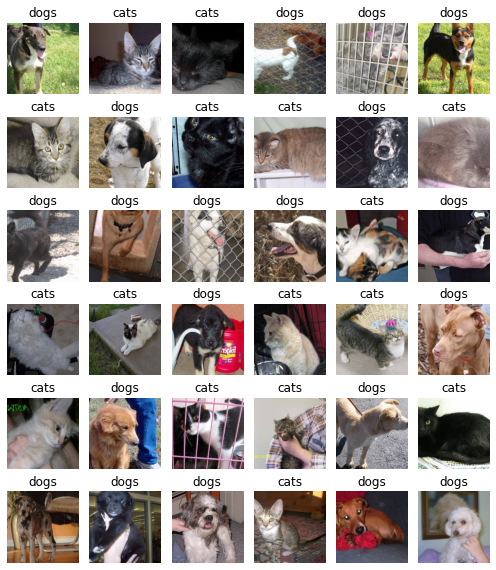

In [6]:
data.show_batch(rows=6,figsize=(7,8))

In [7]:
data.classes, data.c, len(data.train_ds),len(data.valid_ds)


(['cats', 'dogs'], 2, 6400, 1600)

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [9]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.147301,0.077684,0.974375,01:27
1,0.078949,0.052638,0.980000,01:25


In [10]:
learn.model_dir ="/tmp/model/"


In [11]:
learn.save('stage-1')


In [12]:
interp = ClassificationInterpretation.from_learner(learn)

In [13]:
doc(interp.plot_top_losses)
#interp.plot_top_losses(9,figsize=(15,11))

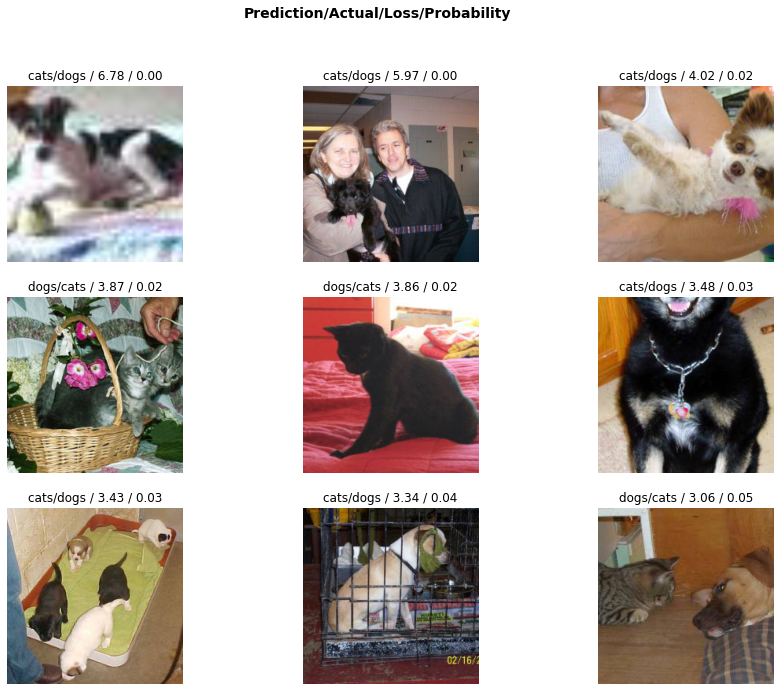

In [14]:
interp.plot_top_losses(9,figsize=(15,11))

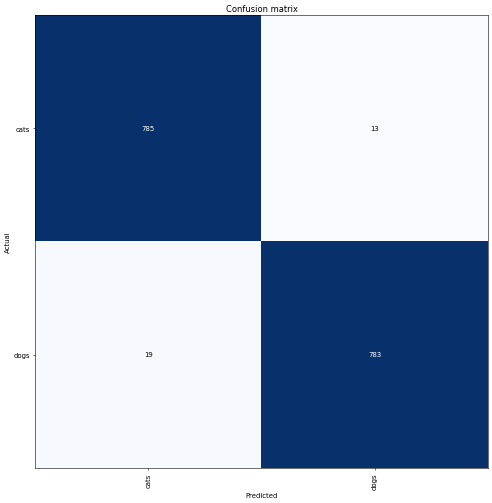

In [15]:
interp.plot_confusion_matrix(figsize = (10,10),dpi=50)

In [16]:
interp.most_confused(min_val=2)

[('dogs', 'cats', 19), ('cats', 'dogs', 13)]

(Category cats, tensor(0), tensor([9.9978e-01, 2.2151e-04]))


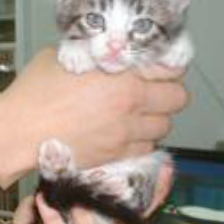

In [17]:
check_img = learn.data.train_ds[1000][0]
print(learn.predict(check_img))
data.train_ds[1000][0]